# Read spectral Data

In [1]:
from read import SpectralState
#s = SpectralState('stateSpectralShellQuICC.hdf5', 'sphere', 'quicc')
#s = SpectralState('stateSpectralSphereQuICC.hdf5', 'sphere', 'quicc')
s = SpectralState('stateSpectralEPM.hdf5')
print('Vel Pol:', s.fields.velocity_pol.shape)
print('Vel Tor:', s.fields.velocity_tor.shape)

Vel Pol: (66, 11)
Vel Tor: (66, 11)


# A) $\omega_f$ : uniform vorticity 

In [3]:
from sphere import getUniformVorticity
rmax = 1
omegaF=getUniformVorticity(s, rmax)
print('Omega_f: ', omegaF)

Omega_f:  [-2.18317115e-16  1.00000000e+00 -2.65032236e-19]


# B) Align with the fluid axis

In [4]:
#%pdb
from sphere import alignAlongFluidAxis
alignAlongFluidAxis(s, omegaF)

# C) Write state file  

# D) $\gamma_f$: rotation angle of the fluid   

In [5]:
from sphere import getGammaF
#filename = ''
#getGammaF()

# E) Go to Fluid Frame 

In [6]:
from sphere import goToFluidFrameOfReference
#getGammaF(filename)
gamma = 0
goToFluidFrameOfReference(s, gamma)

# F) Get Integrator

In [7]:
from sphere import getZIntegrator
nNs = 40
zInt = getZIntegrator(s, "uS", nNs)

id_s:  0 time:  0.22806715965270996
id_s:  1 time:  0.24688982963562012
id_s:  2 time:  0.22234416007995605
id_s:  3 time:  0.24205684661865234
id_s:  4 time:  0.23278594017028809
id_s:  5 time:  0.25328898429870605
id_s:  6 time:  0.23100495338439941
id_s:  7 time:  0.21874213218688965
id_s:  8 time:  0.27193427085876465
id_s:  9 time:  0.21776580810546875
id_s:  10 time:  0.22717499732971191
id_s:  11 time:  0.21491408348083496
id_s:  12 time:  0.27068114280700684
id_s:  13 time:  0.2248220443725586
id_s:  14 time:  0.2939879894256592
id_s:  15 time:  0.2526547908782959
id_s:  16 time:  0.24470186233520508
id_s:  17 time:  0.2175450325012207
id_s:  18 time:  0.23831987380981445
id_s:  19 time:  0.21614384651184082
id_s:  20 time:  0.22887611389160156
id_s:  21 time:  0.22581982612609863
id_s:  22 time:  0.21268391609191895
id_s:  23 time:  0.23579096794128418
id_s:  24 time:  0.2144629955291748
id_s:  25 time:  0.27382564544677734
id_s:  26 time:  0.3814969062805176
id_s:  27 time:  

# E) Get Z-Integral

In [8]:
from sphere import getZIntegral 
#%pdb
zIntegral = getZIntegral(s, zInt)

# E) Get Slices

In [2]:
%matplotlib notebook
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>


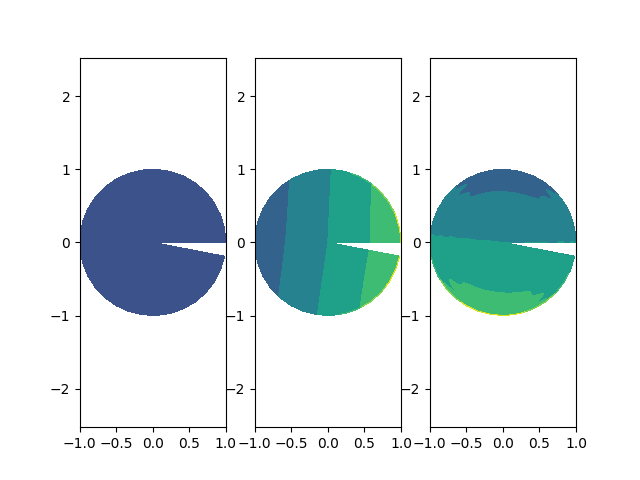

In [3]:
from read import makeEquatorialSlice
eqSlice=makeEquatorialSlice(s)
plt.subplot(131)
plt.axis('Equal')
plt.contourf(eqSlice['x'][:-1,:], eqSlice['y'][:-1,:], eqSlice['U_r'].T)
plt.subplot(132)
plt.axis('Equal')
plt.contourf(eqSlice['x'][:-1,:], eqSlice['y'][:-1,:], eqSlice['U_theta'].T)
plt.subplot(133)
plt.axis('Equal')
plt.contourf(eqSlice['x'][:-1,:], eqSlice['y'][:-1,:], eqSlice['U_phi'].T)

<IPython.core.display.Javascript object>


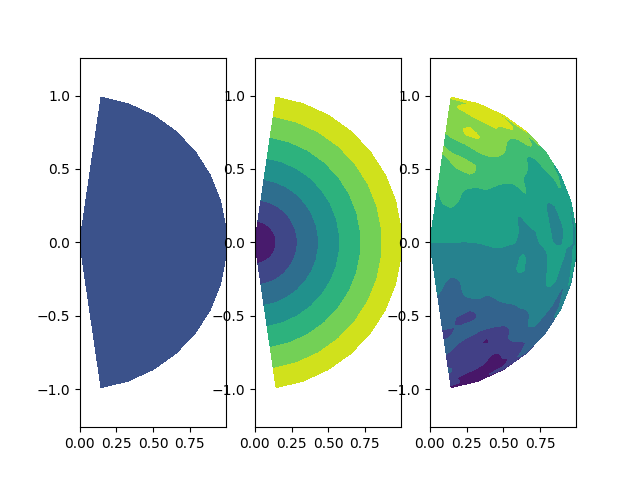

In [4]:
merSlice=s.makeMeridionalSlice()
plt.subplot(131)
plt.axis('Equal')
plt.contourf(merSlice['x'], merSlice['y'], merSlice['U_r'].T)
plt.subplot(132)
plt.axis('Equal')
plt.contourf(merSlice['x'], merSlice['y'], merSlice['U_theta'].T)
plt.subplot(133)
plt.axis('Equal')
plt.contourf(merSlice['x'], merSlice['y'], merSlice['U_phi'].T)